In [41]:
#Les importations nécessaires
import pandas as pd
import numpy as np
import tqdm as tqdm 
import matplotlib.pyplot as plt 

In [42]:
#Création de table de retours quotidiens pour le stock d'Apple en Dollars et ajout collone retour en se basant sur prix high 
retour_quot_apple=pd.read_csv("C:\STOCK_US_XNAS_AAPL.csv",index_col=0)
retour_quot_apple['daily_return'] = (retour_quot_apple['High']/ retour_quot_apple['High'].shift(1)) -1
retour_quot_apple.dropna(inplace = True)
retour_quot_apple.head(5)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
05/20/2022,139.09,140.70,132.61,137.59,"137,426,094",-0.017870
05/19/2022,139.88,141.66,136.60,137.35,"136,095,594",0.006823
05/18/2022,146.85,147.36,139.90,140.82,"109,742,898",0.040237
05/17/2022,148.86,149.77,146.68,149.24,"78,336,250",0.016355
05/16/2022,145.55,147.52,144.18,145.54,"86,643,773",-0.015023


In [43]:
#Création de table de retours quotidiens pour le stock de Meta Platforms en Dollars et ajout colonnes retour en se basant sur prix high
retour_quot_meta=pd.read_csv("C:\STOCK_US_XNAS_FB.csv",index_col=0)
retour_quot_meta['daily_return'] = (retour_quot_meta['High']/ retour_quot_meta['High'].shift(1)) -1
retour_quot_meta.dropna(inplace = True)
retour_quot_meta.head(5)

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
05/20/2022,194.97,197.91,187.87,193.54,"31,465,570",0.004670
05/19/2022,191.20,195.29,189.60,191.29,"24,446,939",-0.013238
05/18/2022,200.00,201.00,191.63,192.24,"23,959,971",0.029239
05/17/2022,202.12,205.46,198.36,202.62,"24,872,730",0.022189
05/16/2022,197.05,205.37,195.93,200.04,"27,112,600",-0.000438


In [44]:
#Table rejoignant les deux, on se base dans l'étude sur les valeur de reotur
portfolio=pd.DataFrame().assign(Retour_Apple=retour_quot_apple['daily_return'],Retour_meta=retour_quot_meta['daily_return'])
portfolio.head(5)

,Retour_Apple,Retour_meta
Date,,
05/20/2022,-0.017870,0.004670
05/19/2022,0.006823,-0.013238
05/18/2022,0.040237,0.029239
05/17/2022,0.016355,0.022189
05/16/2022,-0.015023,-0.000438


In [45]:
#Retour annuel  en DOLLARS 252=numéros de jours où on le trading est possible
mus=((1+portfolio.mean()))**252 - 1
mus

Retour_Apple    4.570577
Retour_meta    -0.369900
dtype: float64

In [46]:
#covariance
cov=portfolio.cov()*252
cov

,Retour_Apple,Retour_meta
Retour_Apple,0.167304,0.151508
Retour_meta,0.151508,0.361838


In [61]:
#Approche Monte Carlo pour générer les portfolios
n_stocks=2 #Dans un portefeuille
n_portefeuille=1000 #qu'on va tester avec
moyenne_variance_pairs=[] #liste pour stocker les pairs de moyennes et variances 
np.random.seed(75)
#Boucle pour générer les portefeuilles
for i in range(n_portefeuille):
    # Choisir aléatoirement les stocks du portefeuille
    stocks = np.random.choice(list(portfolio.columns), n_stocks, replace=False)
    # Choisir poids aleatoirement
    poids = np.random.rand(n_stocks)
    poids = poids/sum(poids) #somme=1
    # Boucle pour calculer retour et Variance des portefeuille
    portfolio_E_Variance = 0
    portfolio_E_Retour = 0
    for i in range(len(stocks)):
        portfolio_E_Retour += poids[i] * mus.loc[stocks[i]]
        for j in range(len(stocks)):
            # Ajoute variance covariance
            portfolio_E_Variance += poids[i] * poids[j] * cov.loc[stocks[i], stocks[j]]
            
    # Ajoute moyenne retour a la liste
    moyenne_variance_pairs.append([portfolio_E_Retour, portfolio_E_Variance])


In [62]:
moyenne_variance_pairs

[[2.1745268341669886, 0.2051695484089229],
 [1.7166582948973261, 0.22451122069944754],
 [2.8517874361074544, 0.18368230687035378],
 [3.157137069737605, 0.17677422327654174],
 [2.3073792924756487, 0.20028453084894904],
 [0.901344709683078, 0.26856910865311634],
 [2.272714921272145, 0.20152761613659215],
 [0.6302093593369194, 0.2859497341496473],
 [2.667925866268809, 0.1886751982861588],
 [0.9715686517205878, 0.26428961350626234],
 [2.321281086542786, 0.19979225895927377],
 [4.19582677452115, 0.1662087095224071],
 [1.4551534331766096, 0.23730072452210726],
 [4.325635376352363, 0.1662935176263782],
 [2.3288085598219936, 0.19952720046596634],
 [1.7681985971527554, 0.22213999626652237],
 [0.9865359257500034, 0.2633893102715984],
 [0.7251108075572672, 0.27971131025139834],
 [1.6737660228287212, 0.22652209786788635],
 [0.8216926971512925, 0.2735337531220305],
 [1.9564393596447887, 0.21389772573140522],
 [2.009482899442477, 0.21169374199351665],
 [3.1219902756103193, 0.17748138680599823],
 [2.

### Graphe

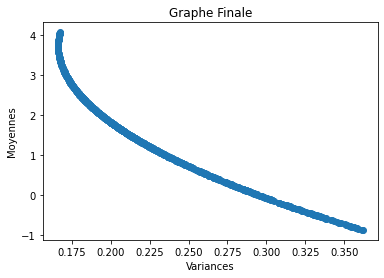

In [74]:
moyennes=[]
variances=[]
for i in range(len(moyenne_variance_pairs)):
    moyennes.append(moyenne_variance_pairs[i][0])
    variances.append(moyenne_variance_pairs[i][1])
risk_free_rate=0.5
for i in range(len(moyennes)):
    moyennes[i]=moyennes[i]-risk_free_rate
plt.scatter(variances,moyennes)
plt.xlabel('Variances')
plt.ylabel('Moyennes')
plt.title('Graphe Finale')
plt.show()